In [16]:
import networkx as nx
import numpy as np
import numpy.linalg as lin
from __future__ import annotations
import matplotlib.pyplot as plt

In [80]:
a = 6
c = 4
rho = 0.95

In [81]:
def make_core_periphy(core_size, branching_factor):
    n = core_size * (1 + branching_factor)
    mat = np.zeros((n,n))
    for i in range(core_size):
        for j in range(core_size):
            if(i == j): continue
            mat[i,j] = 1
    for i in range(core_size, n):
        parent = (i - core_size) // branching_factor 
        mat[parent, i] = 1
    return mat

def specNorm(A: np.matrix) -> float:
    return lin.norm(A, ord=2)
    
def centralty(A: np.matrix, rho: float, alpha) -> np.matrix:
    """

    Parameters
    ----------
    A : np matrix
    rho : network effect

    Returns
    -------
    Centrality vector as described in paper
    """
    n = A.shape[0]
    ident = np.eye(n, n)
    ones = np.ones((n, 1))
    ApA = A + A.T
    eig = specNorm(ApA)
    alpha = rho / eig
    central = lin.inv(ident - (alpha * ApA))
    central = central @ ones  # Checked.  this > 0
    return central

def priceVector(A: np.matrix, rho: float, a: int | float, c: int | float,k = None) -> np.matrix:
    """
    Parameters
    ----------
    A : Network
    rho : network strength
    a : stand alone util
    c : marginal cost. Should be less than a

    Returns
    -------
    Vector reprsenting what price to charge individual i
    """
    n = A.shape[0]
    ones = np.ones((n, 1))
    spec = specNorm(A + A.T)
    alpha = rho / spec
    central = centralty(A, rho, alpha)  # This should be A not A + A.T because of how centralty function is designed
    dif = A - A.T
    pv1 = ((a + c) / 2) * ones
    pv2 = ((a - c) * alpha * 0.5) * (dif @ central)
    return pv1 + pv2

def uniformPrice(a, c, n) :
    return (a + c) / 2 * np.ones((n, 1))

def consumption(A: np.matrix, rho: float, a: int | float, c: int | float, k = None) -> np.matrix:
    """
    Parameters
    ----------
    A : Network
    rho : network strength
    a : stand alone util
    c : marginal cost. Should be less than a

    Returns
    -------
    Vector reprsenting what price to charge individual i
    """
    n = A.shape[0]
    ones = np.ones((n, 1))
    spec = specNorm(A + A.T)
    alpha = rho / spec
    central = centralty(A, rho, alpha)  # This should be A not A + A.T because of how centralty function is designed
    dif = A - A.T
    pv1 = ((a + c) / 2) * ones
    pv2 = ((a - c) * alpha * 0.5) * (dif @ central)
    return pv1 + pv2


def profit(p, c, cons : np.matrix) -> float:
    """
    Parameters
    ----------
    p : price vector
    c : consumption vector
    cons : consumption vector

    Returns
    -------
    Profit vector
    """
    n = (p.shape[0],1)
    res = (p - c * np.ones(n)).T @ cons
    return res[0,0]

a = 5
c = 4

In [82]:
n = 6
stop = 5
knownProfits = []
uniformProfits = []
x = [i for i in range(1,stop)]
for i in range(1,stop):
    total_size = n * (1 + i)
    # profit if we know degrees 
    m = make_core_periphy(n, i)
    known_p = priceVector(m, a, c, rho)
    known_cons = consumption(m, a, c, rho)
    known_profit = profit(known_p, c, known_cons)
    knownProfits.append(known_profit)
    # profit if we have uniform prices 
    uniV = uniformPrice(a, c, total_size)
    uniform_cons = consumption(m, a, c, rho, uniV)
    uniform_profit = profit(uniV, c, uniform_cons)
    uniformProfits.append(uniform_profit)

    

In [83]:
uniformProfits[:10]

[35.800553843529634, 57.0486283998991, 78.53956743038229, 100.23192779620258]

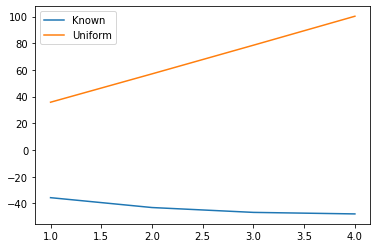

In [84]:
plt.plot(x, knownProfits, label = "Known")
plt.plot(x, uniformProfits, label = "Uniform")
plt.legend()
plt.show()

In [9]:
np.argmax(ratios)

70